### Worcount histograms

In [12]:
import pymongo, re, nltk, numpy as np
from matplotlib import pyplot as plt

In [13]:
def get_sentence_length(full_comments=False,language="es"):
    conn=pymongo.MongoClient()
    db = conn["db_comments_processed"]
    l=[]
    for elem in db.comments_processed.find({},no_cursor_timeout=True):
        if elem['language'] == language:
            if full_comments == True:
                text = " ".join((elem['sentences']))
                text = len(get_word_list(text))
                l.append(text)
            else:
                for i in elem['sentences']:
                    text = len(get_word_list(i))
                    l.append(text)

    return l

def get_word_list(text,remove_stopwords=False,repeat=False):
    if remove_stopwords == True:
        with open("es_stopwords.txt") as f:
            es_stopwords = f.readlines()
        es_stopwords = [x.strip() for x in es_stopwords] 
        for stopword in es_stopwords:
            text = re.sub(stopword, '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    punctuation = ['.',',','%','&','\'','/','+','!']
    rx = '[' + re.escape(''.join(punctuation)) + ']'
    text = re.sub(rx, '', text)
    if repeat:
        tokens = nltk.wordpunct_tokenize(text)
    else:
        tokens = sorted(set(nltk.wordpunct_tokenize(text)))
    remove_from_vocabulary = ['-',')','(','(?)','1','=','[',']','][',':','<','>',';',':)','?']
    for i in remove_from_vocabulary:
        if i in tokens:
            tokens.remove(i)
    return tokens

In [14]:
c_es = get_sentence_length(full_comments=True,language="es")
s_es = get_sentence_length(full_comments=False,language="es")

In [18]:
print("Average Spanish comment word count: ", np.mean(c_es))
print("Average Spanish sentence word count: ", np.mean(s_es))

Average Spanish comment word count:  27.816164817749605
Average Spanish sentence word count:  16.74895046179681


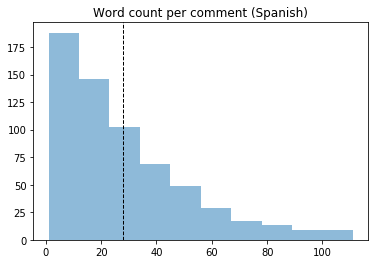

In [20]:
plt.hist(c_es,alpha=0.5)
plt.title('Word count per comment (Spanish)')
plt.axvline(np.mean(c_es), color='k', linestyle='dashed', linewidth=1)
plt.show()

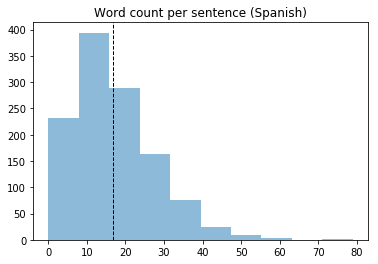

In [21]:
plt.hist(s_es,alpha=0.5)
plt.title('Word count per sentence (Spanish)')
plt.axvline(np.mean(s_es), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [22]:
c_ca = get_sentence_length(full_comments=True,language="ca")
s_ca = get_sentence_length(full_comments=False,language="ca")

In [23]:
print("Average Catalan comment word count: ", np.mean(c_ca))
print("Average Catalan sentence word count: ", np.mean(s_ca))

Average Catalan comment word count:  25.451814768460576
Average Catalan sentence word count:  15.399593633592957


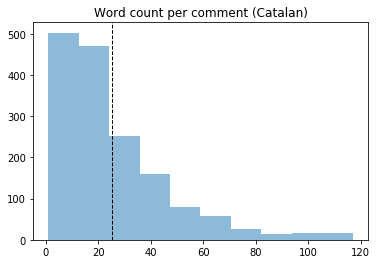

In [24]:
plt.hist(c_ca,alpha=0.5)
plt.title('Word count per comment (Catalan)')
plt.axvline(np.mean(c_ca), color='k', linestyle='dashed', linewidth=1)
plt.show()

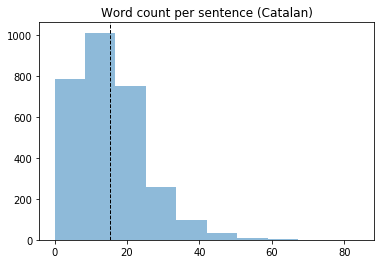

In [25]:
plt.hist(s_ca,alpha=0.5)
plt.title('Word count per sentence (Catalan)')
plt.axvline(np.mean(s_ca), color='k', linestyle='dashed', linewidth=1)
plt.show()